# A simple nonlinear dataset: XOR

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(cmap.N)]

mpl.rcParams["font.size"] = 24
mpl.rcParams["lines.linewidth"] = 2

## XOR Dataset

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

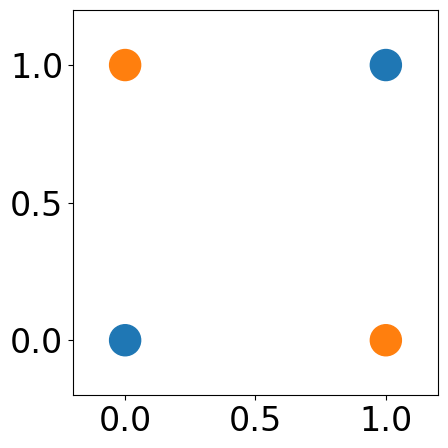

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=[colors[Y[i]] for i in range(len(Y))], s=500)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
fig.tight_layout()

## PyTorch implementation

In [4]:
import torch
class LinearRegresion(torch.nn.Module):
    def __init__(self, indim):
        super(LinearRegresion, self).__init__()
        self.linear = torch.nn.Linear(indim, 1)
    def forward(self, x):
        x = self.linear(x)
        return x

### Logistic Regression

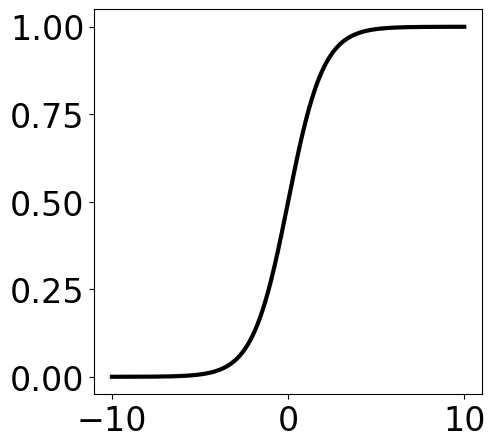

In [5]:
x = np.linspace(-10, 10, 1000)
y = 1/(1+np.exp(-x))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.plot(x, y, "k-", linewidth=3)

In [6]:
model = LinearRegresion(2)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

train_loss = []
data = torch.from_numpy(X).float()
y_true = torch.from_numpy(Y).float()

for epoch in range(500):
    optimizer.zero_grad()

    output = model(data)
    y_pred = torch.sigmoid(output)

    loss = criterion(y_pred, y_true.reshape(y_pred.shape))

    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()

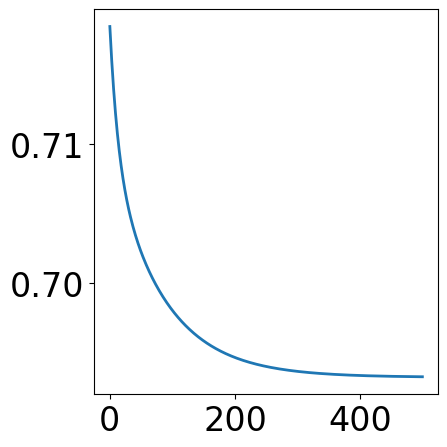

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.plot(train_loss)
fig.tight_layout()

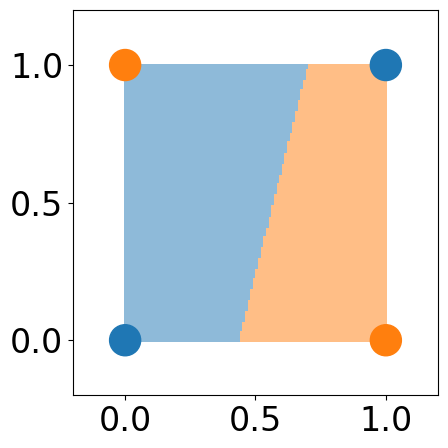

In [8]:
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
x_grid = np.hstack([xx1.ravel().reshape(-1, 1), xx2.ravel().reshape(-1, 1)])
x_grid = torch.from_numpy(x_grid).float()
output = model(x_grid)
y_grid_pred = torch.sigmoid(output)
y_grid_pred = y_grid_pred.reshape(xx1.shape)


# plot space separation
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

custom_cmap = ListedColormap([cmap(0), cmap(1)])
plt.pcolormesh(xx1, xx2, y_grid_pred>=0.5, cmap=custom_cmap, alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=[colors[Y[i]] for i in range(len(Y))], s=500)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
fig.tight_layout()

## Multiple layer Perceptron

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLPRegresion(torch.nn.Module):
    def __init__(self, indim, hidden_dims):
        assert isinstance(hidden_dims, list), f"Hidden dimensions {hidden_dims} should be a list"
        super(MLPRegresion, self).__init__()
        hidden_dims = [indim] + hidden_dims
        layers = []
        for i in range(len(hidden_dims)-1):
            layers.append(torch.nn.Linear(hidden_dims[i], hidden_dims[i+1]))

        layers.append(torch.nn.Linear(hidden_dims[-1], 1))

        self.layers = nn.ModuleList(layers)

    def forward( self, x):
        for layer in self.layers[:-1]:
            x = layer(x)
            x = nn.ReLU()(x)
        x = self.layers[-1](x)
        return x

In [10]:
model = MLPRegresion(2, [3, 2])
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

train_loss = []
data = torch.from_numpy(X).float()
y_true = torch.from_numpy(Y).float()

for epoch in range(5000):
    optimizer.zero_grad()

    output = model(data)
    y_pred = torch.sigmoid(output)

    loss = criterion(y_pred, y_true.reshape(y_pred.shape))

    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()

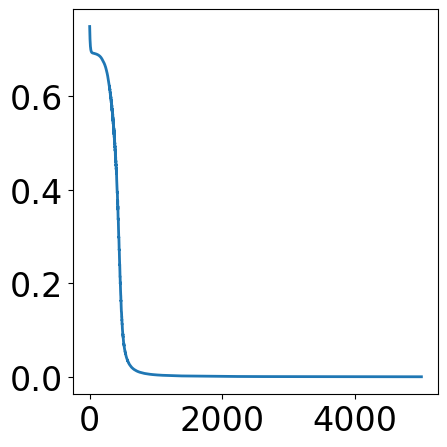

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.plot(train_loss)
fig.tight_layout()

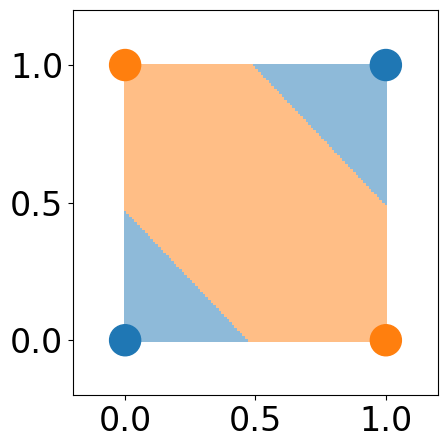

In [12]:
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
x_grid = np.hstack([xx1.ravel().reshape(-1, 1), xx2.ravel().reshape(-1, 1)])
x_grid = torch.from_numpy(x_grid).float()

with torch.no_grad():
    output = model(x_grid)

y_grid_pred = torch.sigmoid(output)
y_grid_pred = y_grid_pred.reshape(xx1.shape)


# plot space separation
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

custom_cmap = ListedColormap([cmap(0), cmap(1)])
plt.pcolormesh(xx1, xx2, y_grid_pred>=0.5, cmap=custom_cmap, alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=[colors[Y[i]] for i in range(len(Y))], s=500)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
fig.tight_layout()